In [1]:
from phase_diagram.phase_diagram import PhaseDiagram, ureg

import matplotlib.pyplot as plt
from src.plot import Plot

import ipywidgets
from ipywidgets import interact, interactive

In [2]:
Q_ = ureg.Quantity

In [3]:
water = PhaseDiagram('water')

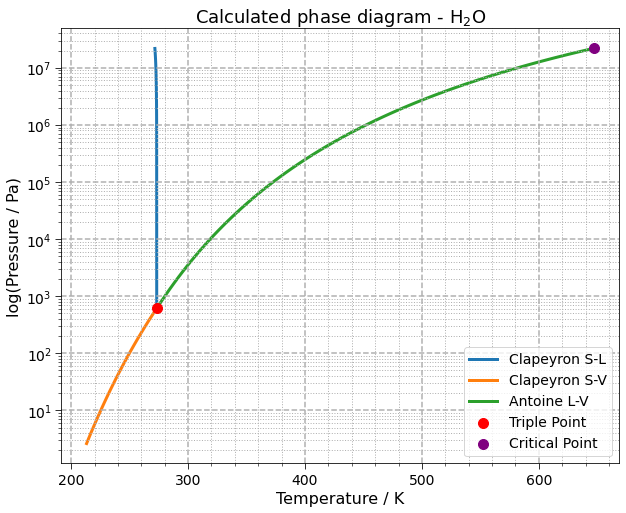

In [4]:
water.plot()

In [5]:
style = {'description_width': 'initial'}

temperature = ipywidgets.FloatSlider(
    value=273,
    min=200,
    max=700,
    step=50,
    description='Temperature / K:',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='.2f',
    style=style)

pressure = ipywidgets.FloatLogSlider(
    value=10**5,
    base=10,
    min=1,
    max=8,
    step=1,
    description='Pressure / Pa:',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='.1e',
    style=style)

In [6]:
from IPython.display import display
def funcao(temperature, pressure):
    fig, ax = plt.subplots(figsize=(10, 8), facecolor=(1, 1, 1))
    
#     ax.set_xlim(272,274)
#     ax.set_ylim(0.8E5,1E6)
    texto = water.physical_state([temperature * water.ureg('K'), pressure * water.ureg('Pa')])    
    water.plot(ax=plt.gca(), scale_log=True)
    a = Plot(x_unit='K', y_unit='Pa', ax=plt.gca(),  x_label='Temperature', y_label='Pressure', legend=True, scale_log=True)
    a.plot_point([temperature * water.ureg('K'), pressure * water.ureg('Pa')], zorder=3, s=100, c='black', label=texto)
    plt.gca().annotate(texto, (temperature, pressure), fontsize=24, ha='left',
                       va='top', color='red')
    
    

    
graph = interactive(funcao,
                    temperature=temperature,
                    pressure=pressure,
                   )
display(graph)

interactive(children=(FloatSlider(value=273.0, continuous_update=False, description='Temperature / K:', max=70…